#### Importthe libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import datetime as dt

#### Read the data

In [2]:
bike_df = pd.read_csv('./day.csv')

#### Converting date to day, month, and year

In [3]:
bike_df['day'] = bike_df['dteday'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y').day)
bike_df = bike_df.drop(['dteday'], axis=1)

In [4]:
bike_df.nunique()

instant       730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
day            31
dtype: int64

In [5]:
TARGET = 'cnt'

In [6]:
YESNO = ['yr','holiday','workingday']

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 91.4 KB


#### Columns evaluation
Columns with 0 & 1 are: yr, holiday, and working day

Columns that can turn into dummies is: weathsit

Columns that can turn into categorical are: 'season','mnth','yr','holiday','weekday','workingday','weathersit', 'day'

#### Change Data Categories

In [8]:
category_cols=['season','mnth','yr','holiday','weekday','workingday','weathersit','day']
for col in category_cols:
  bike_df[col]=bike_df[col].astype('category')

In [9]:
bike_categorical = bike_df.select_dtypes(include='category')
bike_numerical = bike_df.select_dtypes(include='number')

In [10]:
print("There are {} rows and {} columns in this data set.".format(bike_df.shape[0], bike_df.shape[1]))
print("There is {} categorical data and {} numerical data.".format(bike_categorical.shape, bike_numerical.shape) )
print("There is {} missing data and {} duplicate values".format(bike_df.isnull().sum()[1].sum(), len(bike_df[bike_df.duplicated()])))
print("The Targe variable is 'cnt'")

There are 730 rows and 16 columns in this data set.
There is (730, 8) categorical data and (730, 8) numerical data.
There is 0 missing data and 0 duplicate values
The Targe variable is 'cnt'


### Exploratory Data Analysis
#### Use boxplot to find correlations

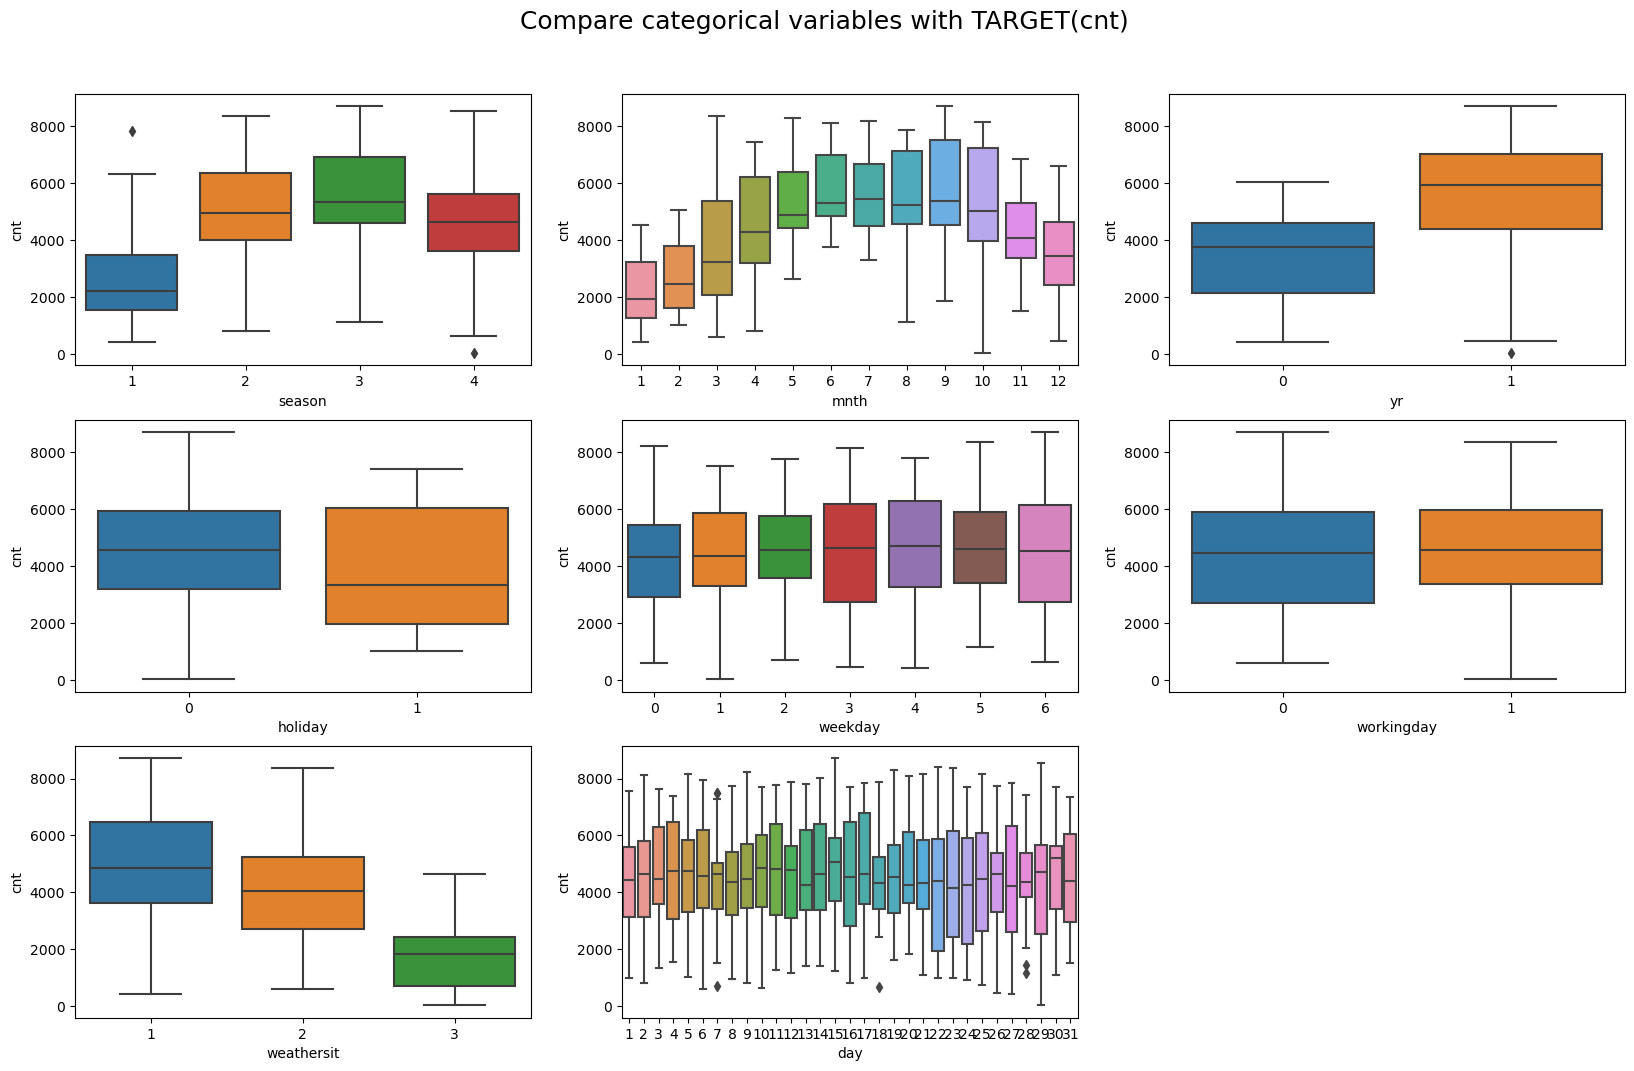

In [11]:
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Compare categorical variables with TARGET(cnt)", fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 3
# calculate number of rows
nrows = len(category_cols) // ncols + (len(category_cols) % ncols > 0)

for n, m in enumerate(bike_df[category_cols]):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.boxplot(x=bike_df[category_cols[n]], y=bike_df[TARGET], ax=ax)
    ax.set_xlabel(category_cols[n])

#### Analysis based on boxplot:
- Falls has the highest bike rental count. Spring has the lowest bike rental count.
- Year: 2019 bike rental is higher than 2018. 
- Holiday: non-holiday (0) has a wider range compared to holiday
- Weekday: Wednesday and Thursday appear to have more bike rental
- Working: inconclusive 
- Weather: Bike rentalis high  when it is  Clear, Few clouds, Partly cloudy, Partly cloudy
- Month: More bike rentals occur between May and September
- Day: It seems that bike rental occur more in the middle of the month

#### Use heatmap to find correlations

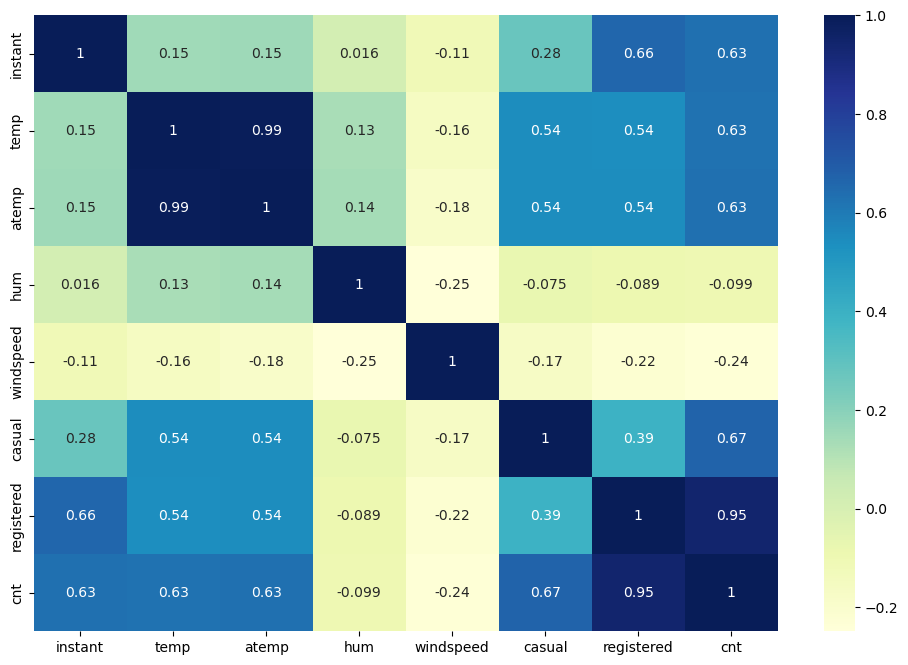

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(bike_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

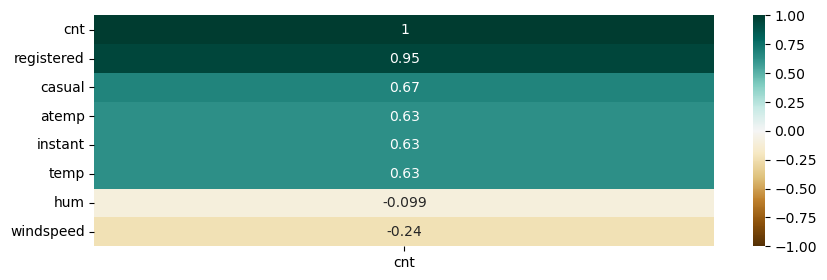

In [13]:
corr = bike_df.corr()
plt.figure(figsize=(10, 3))
sns.heatmap(corr[[TARGET]].sort_values(by=TARGET, ascending=False), vmin=-1, annot=True, cmap='BrBG');
corr_order = corr[[TARGET]].sort_values(by=TARGET, ascending=False).index

#### Using the positive correlated variables from above to plot against cnt.

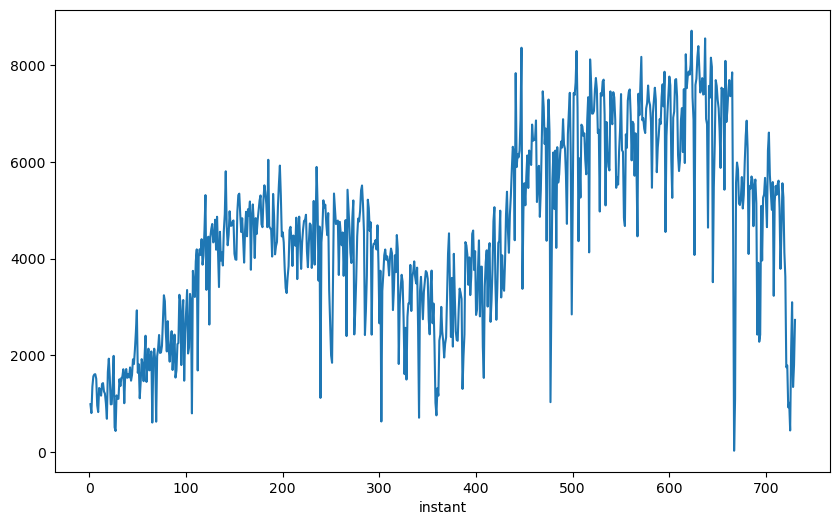

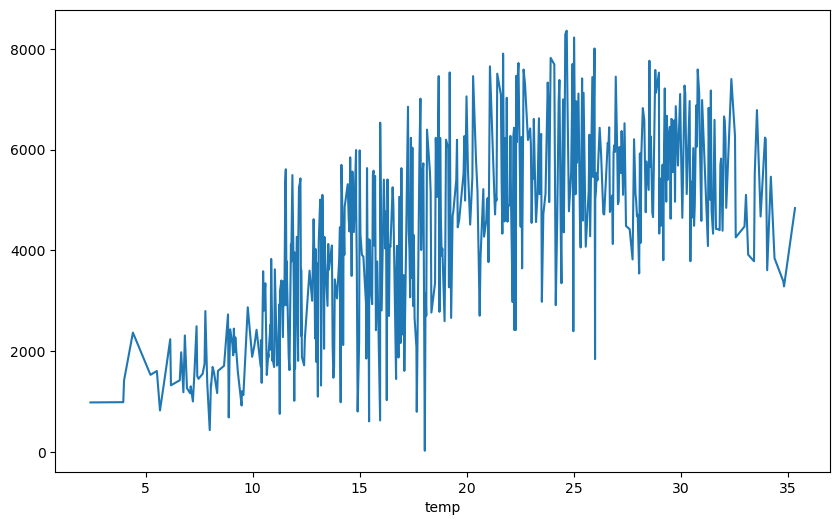

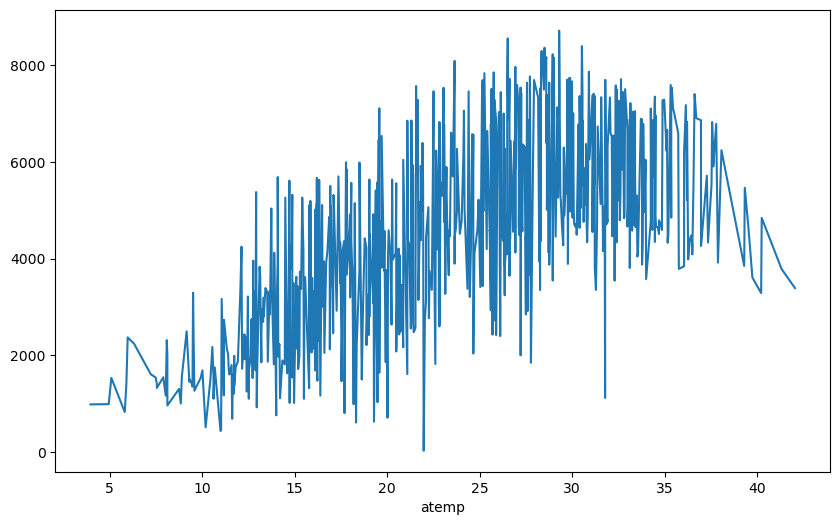

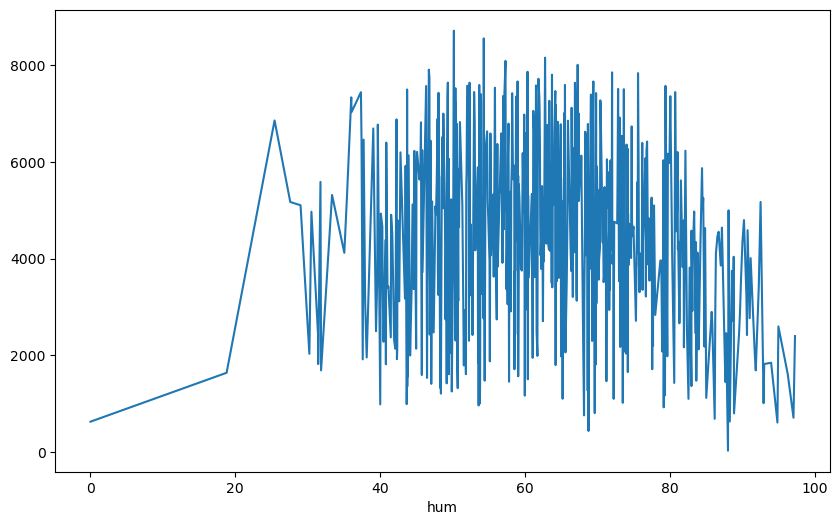

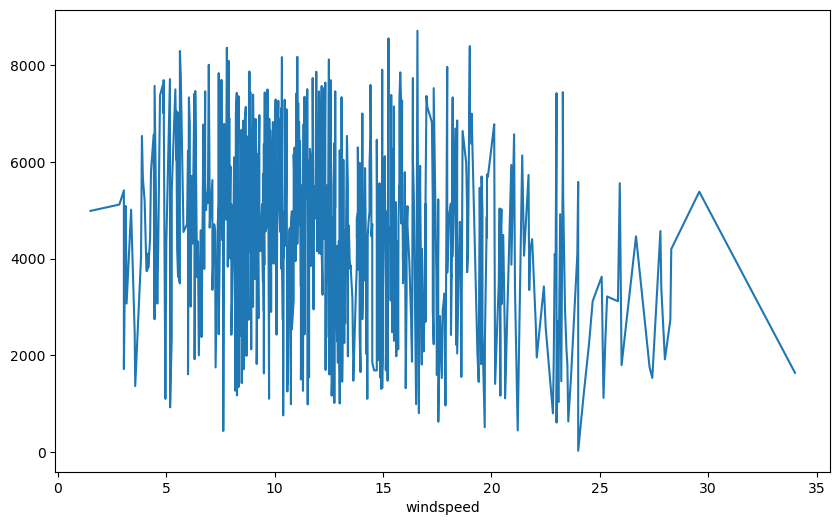

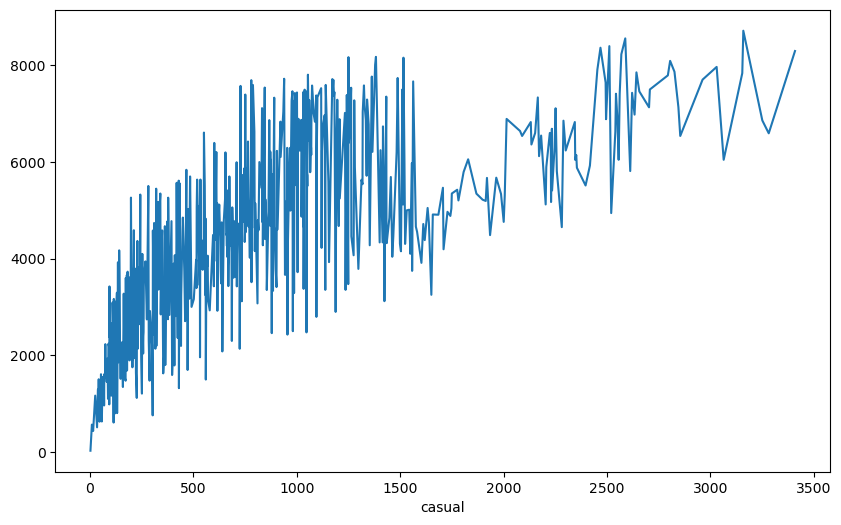

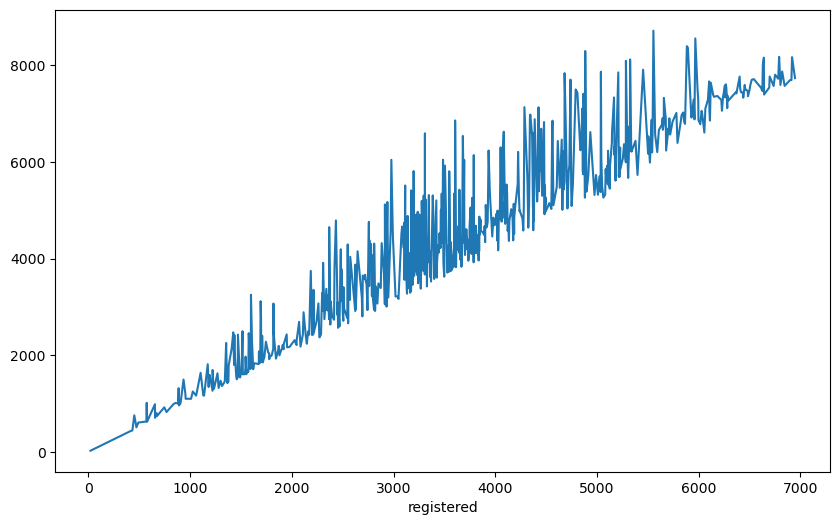

In [14]:
# plots to analyze the distribution of all numerical features
# for col in ['registered', 'casual', 'atemp', 'instant', 'temp','day']:
for col in bike_numerical:
    if col != TARGET:
      plt.figure(figsize=(10,6))
      bike_df.groupby(col).mean()[TARGET].plot()
      plt.xlabel(col)
plt.show()


#### Map out numerical assignment to human readable text

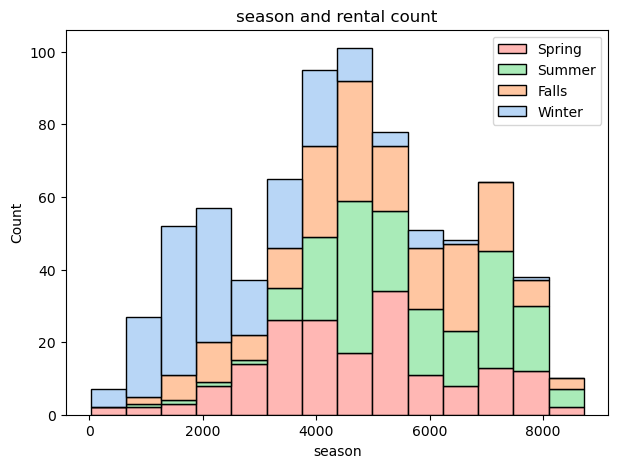

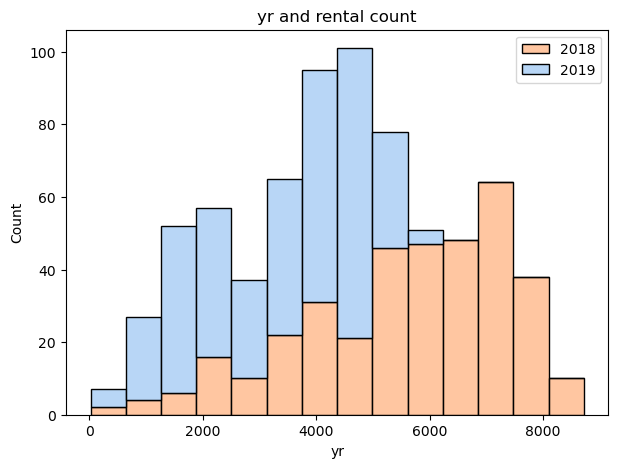

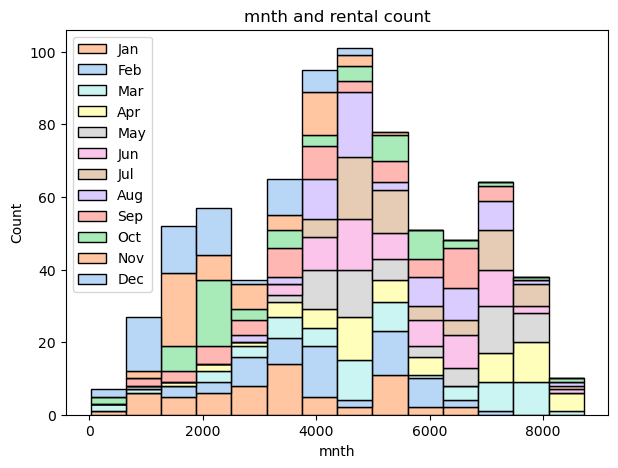

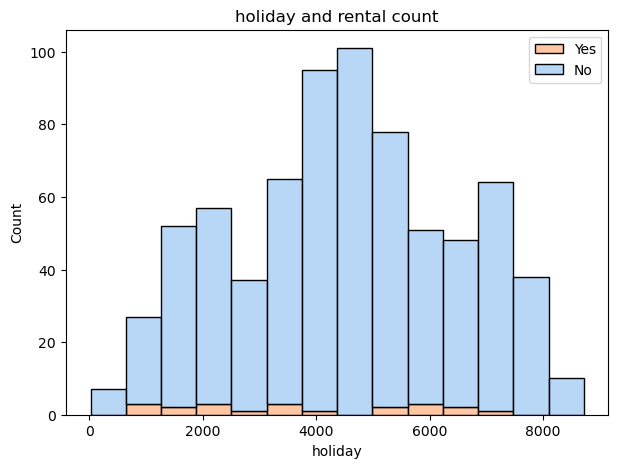

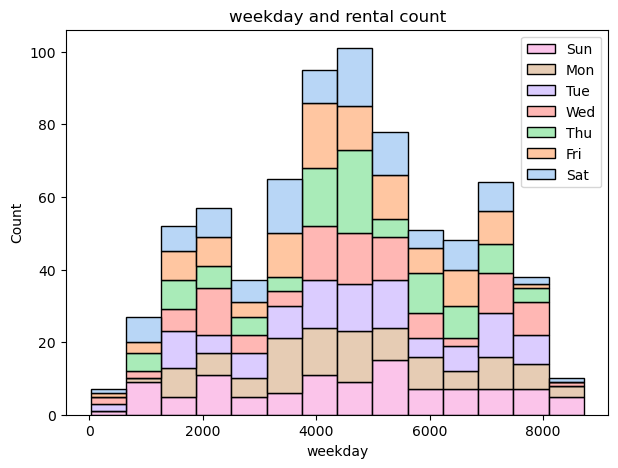

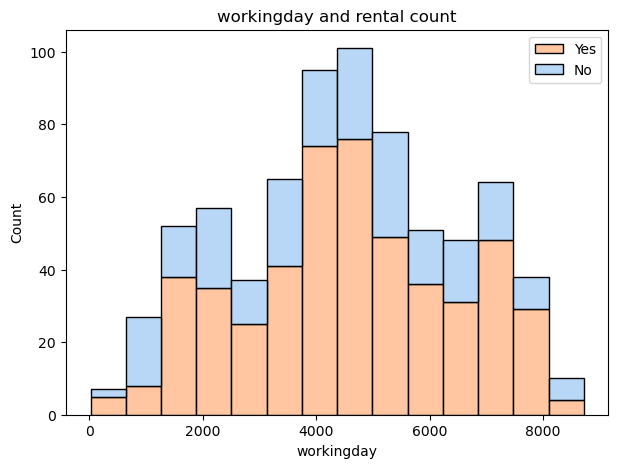

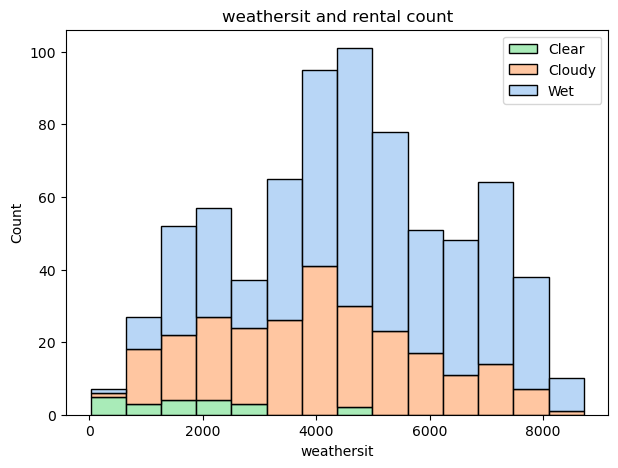

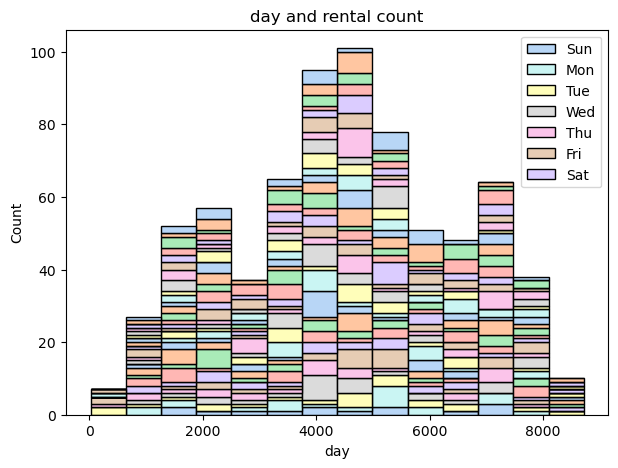

In [15]:
dictonary = {'season': ['Spring', 'Summer', 'Falls', 'Winter'],
             'yr': [2018, 2019],
             'mnth': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
             'holiday':['Yes','No'],
             'weekday':['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],
             'workingday':['Yes','No'],
             'weathersit':['Clear','Cloudy','Wet','Heavy Snow/Rain'],
             'day':['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
            }     
for k,v in dictonary.items():
    f = plt.figure(figsize=(7,5))
    ax = f.add_subplot(1,1,1)
    sns.histplot(data=bike_df, ax=ax, stat="count", multiple="stack",
                 x="cnt",kde=False,
                 palette="pastel", hue=bike_df[k],
                 element="bars", legend=True)
    ax.set_title(f"{k}" " and rental count")
    ax.set_xlabel(k)
    ax.legend(v)
    ax.set_ylabel("Count")


#### Perform Simple Linear Regression
Quickly see which variable has positive impact on the model to be trained.

Based on the chart below, Registered is the most probable variable to be trained first.

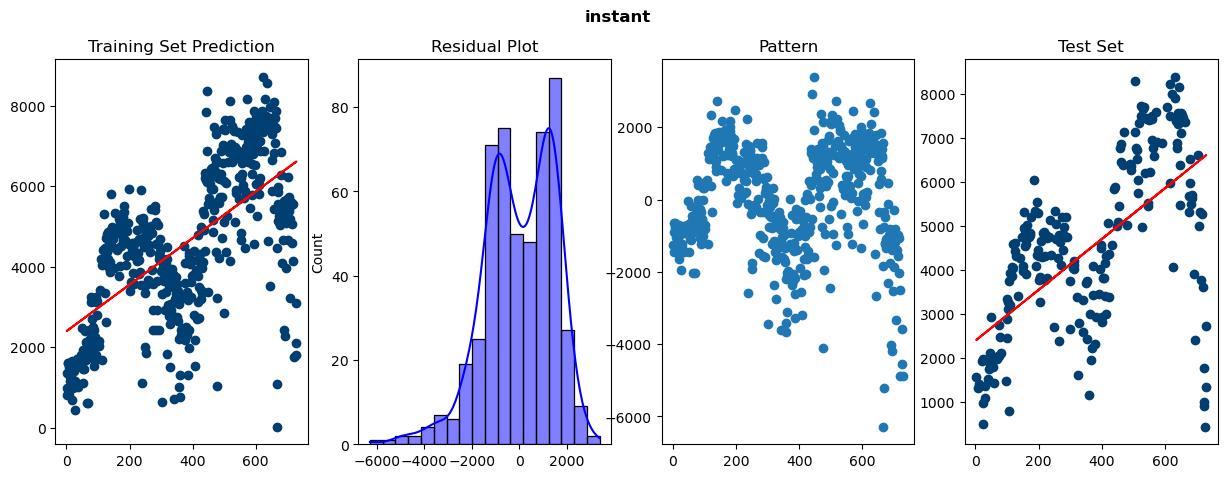

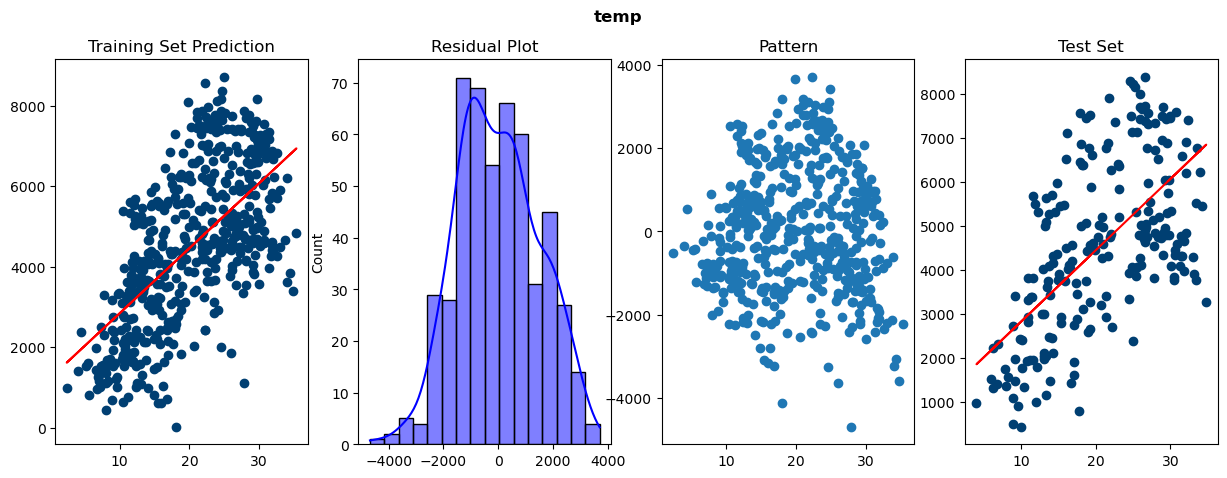

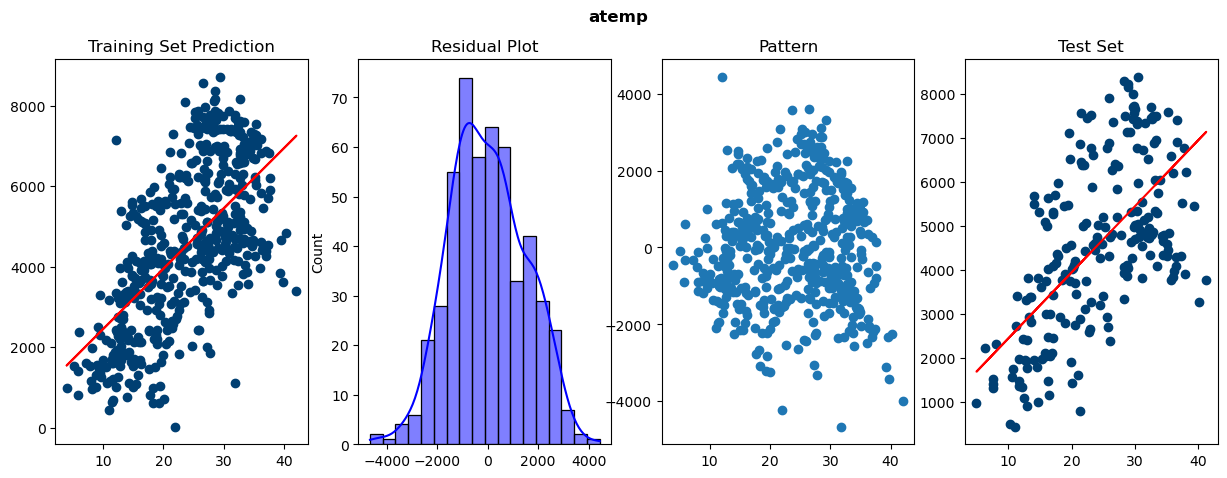

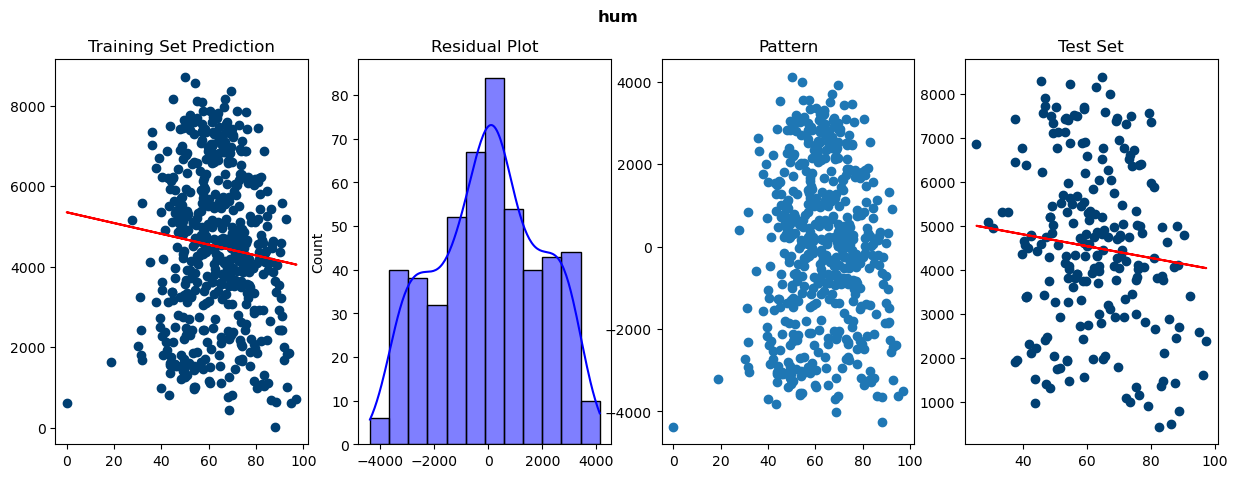

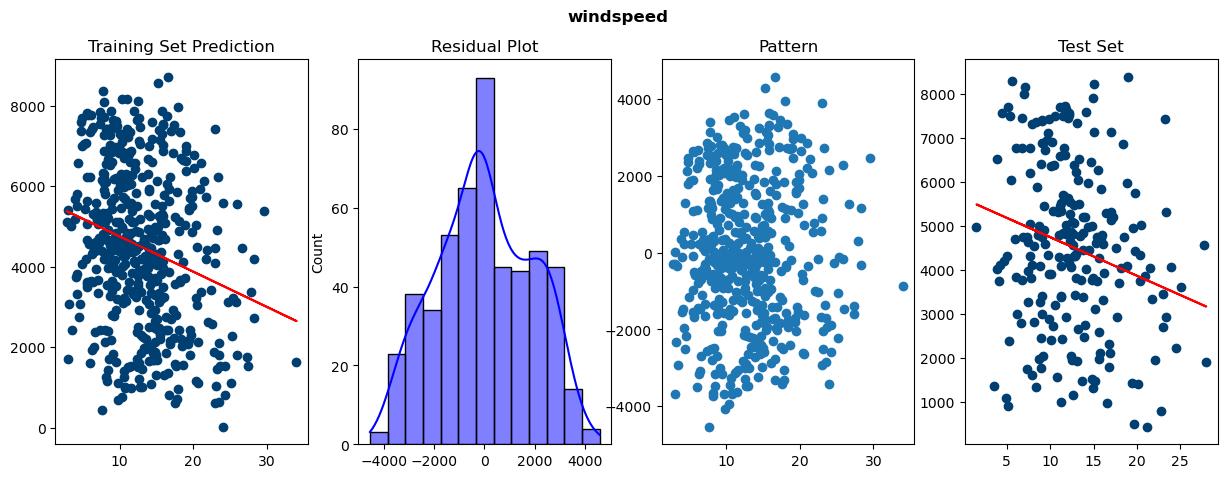

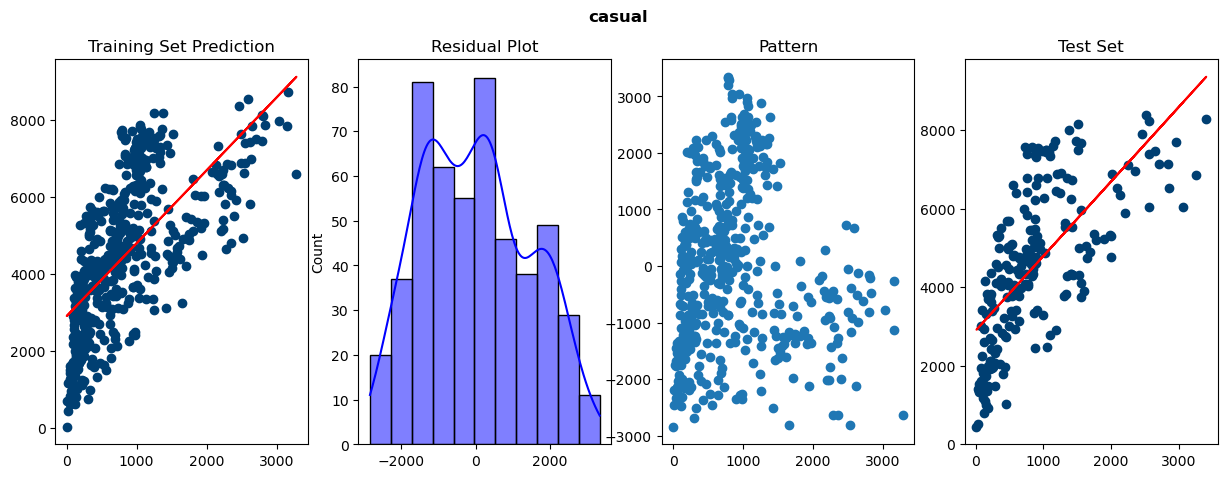

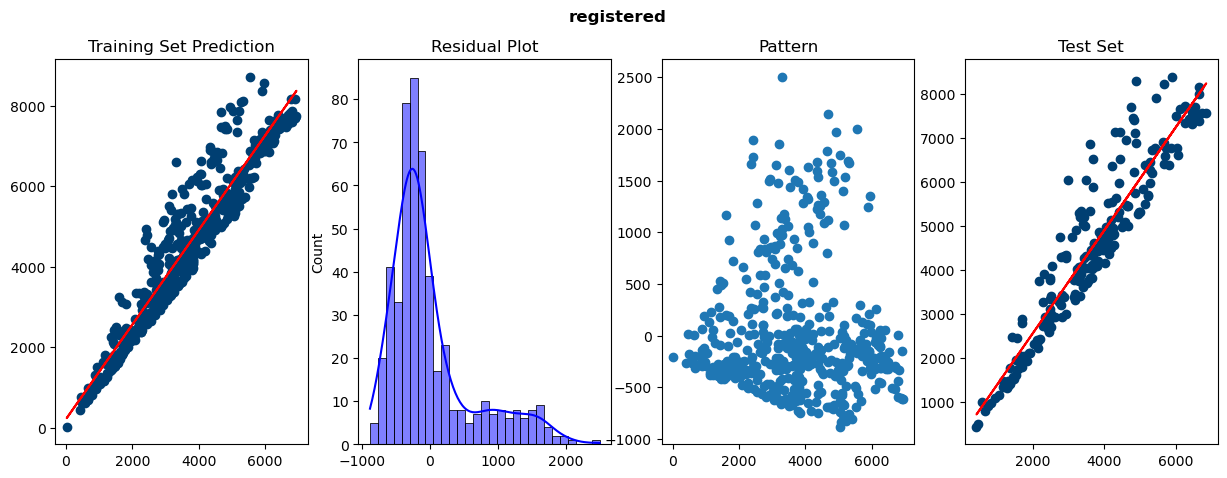

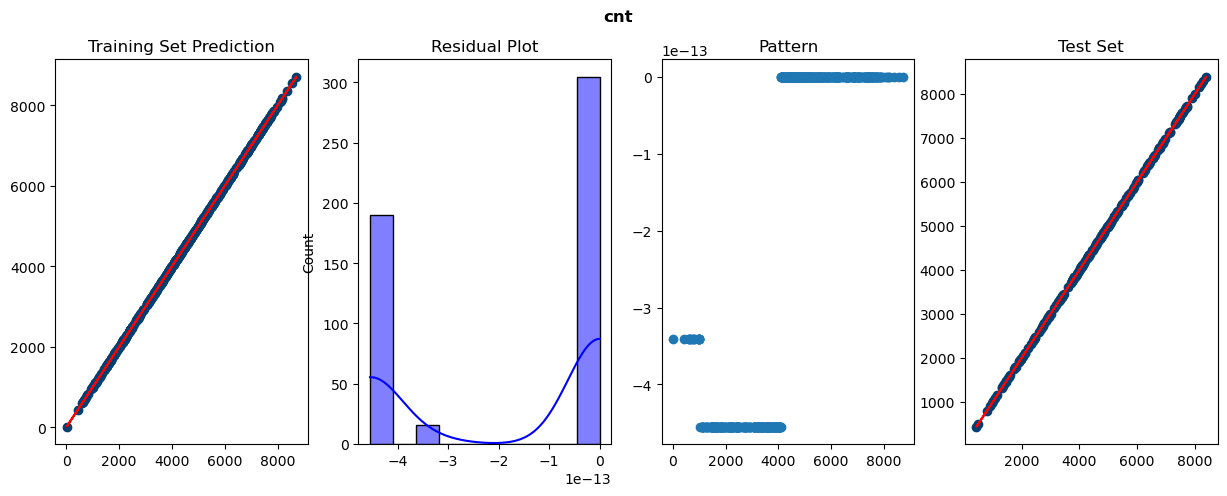

In [16]:
rfe_df = bike_df
df2=bike_df
adv = bike_numerical
for i in adv:
    x = df2[i]
    y = df2[TARGET]
    m = (x.mean() * y.mean() - (x*y).mean())/((x.mean() * x.mean())-(x * x).mean())
    b = y.mean() - m*x.mean()
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100)
    X_train_copy = X_train.copy()
    X_train_copy = X_train.copy()

    X_train_sm = sm.add_constant(X_train)
    lr =sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()

    y_train_pred = lr_model.predict(X_train_sm)
    res = y_train - y_train_pred

    # plot the prediction in red  
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
    fig.suptitle(i, fontweight ="bold")

    ax1.scatter(X_train, y_train, color='#003F72')
    ax1.plot(X_train, b + m * X_train, 'r' )
    ax1.set_title("Training Set Prediction")
    
    sns.histplot(res, color='blue', kde=True, ax=ax2)
    ax2.set_title("Residual Plot")
    
    ax3.scatter(X_train, res)
    ax3.set_title("Pattern")
    
    ax4.scatter(X_test, y_test, color='#003F72')
    ax4.plot(X_test, b + m * X_test, 'r' )
    ax4.set_title("Test Set")
    
    plt.show()

#### Multiple Linear Regression

##### Create dummy variables
Drop the original categorical data after concatenation.

In [17]:
DUMMIES = ['weathersit']
DUMMY_COLS = pd.get_dummies(rfe_df[DUMMIES], drop_first=True)
rfe_df = pd.concat([bike_df, DUMMY_COLS], axis=1)
rfe_df = rfe_df.drop(DUMMIES, axis=1)
rfe_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,weathersit_2,weathersit_3
0,1,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0
1,2,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,2,1,0
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0
3,4,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0
4,5,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0


#### Train Test Split

In [18]:
rfe_train, rfe_test = train_test_split(rfe_df, train_size=0.7, random_state=100)
print(rfe_train.shape)
print(rfe_test.shape)

(510, 17)
(220, 17)


#### Scaling the data
Apply scaler() to all the columns except the 'YESNO' and 'DUMMIES' variables


In [19]:
EXCLUDE = pd.concat([rfe_df[YESNO], rfe_df[DUMMY_COLS.columns]], axis=1).columns
SCALED = rfe_df.loc[:,~rfe_df.columns.isin(EXCLUDE)]

In [20]:
#1 Scale the numerical data
scaler = MinMaxScaler()

#2. Fit on data
rfe_train[SCALED.columns] = scaler.fit_transform(rfe_train[SCALED.columns])

In [21]:
rfe_train.describe()

,instant,season,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,day,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505055,0.504575,0.503743,0.498366,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.486405,0.345098,0.029412
std,0.287907,0.370078,0.315038,0.336182,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.297061,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255838,0.333333,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000
50%,0.510989,0.666667,0.545455,0.500000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000
75%,0.757898,0.666667,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Createa functions so it can be re-used as we will manually add one variable at a time

In [22]:
# Create a dataframe that will contain the names of all the feature variables
def get_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) if (x.shape[1]>0)]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    return vif

Taking the cue from the Simple Linear Regression above, we see that Registered immediately get us 89.9% for R-squared while its p-value is zero.

In [23]:
print("The list of correlation in descending order: \n{}".format(corr_order))

The list of correlation in descending order: 
Index(['cnt', 'registered', 'casual', 'atemp', 'instant', 'temp', 'hum',
       'windspeed'],
      dtype='object')


### For the second model, we use Recursive Feature Elimination (RFE)

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
# X_train, y_train
y_train = rfe_train.pop(TARGET)
X_train = rfe_train

In [26]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('instant', True, 1),
 ('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 3),
 ('weekday', False, 2),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 6),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('day', False, 5),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['instant', 'season', 'yr', 'mnth', 'temp', 'atemp', 'windspeed',
       'casual', 'registered', 'weathersit_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['holiday', 'weekday', 'workingday', 'hum', 'day', 'weathersit_2'], dtype='object')

#### Model Building 

In [30]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.909e+31
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:15:49   Log-Likelihood:                 17649.
No. Observations:                 510   AIC:                        -3.528e+04
Df Residuals:                     499   BIC:                        -3.523e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.539e-16   4.51e-17      7.853      0.000    2.65e-16    4.42e-16
instant      -1.443e-15    8.3e-16     -1.739      0.083   -3.07e-15    1.87e-16
season        1.084e-16   5.61e-17      1.932      0.054   -1.82e-18    2.19e-16
yr            7.216e-16   4.17e-16      1.729      0.084   -9.83e-17    1.54e-15
mnth         -5.551e-17   3.85e-16     -0.144      0.885   -8.12e-16    7.01e-16
temp           1.11e-16   3.19e-16      0.348      0.728   -5.15e-16    7.37e-16
atemp         -1.11e-16    3.4e-16     -0.326      0.744   -7.79e-16    5.57e-16
windspeed     2.776e-16   6.42e-17      4.321      0.000    1.51e-16    4.04e-16
casual           0.3775   6.28e-17   6.01e+15      0.000       0.377       0.377
registered       0.7968   8.53e-17   9.34e+15      0.000       0.797       0.797
weathersit_3  -7.98e-17   6.54e-17     -1.221      0.223   -2.08e-16    4.86e-17
==============================================================================
Omnibus:                      103.948   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.488
Skew:                           0.035   Prob(JB):                     2.16e-05
Kurtosis:                       1.997   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop a variable based on highest VIF and high p-value

In [31]:
X_train_new = X_train_rfe.drop(['mnth'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [32]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.220e+30
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:16:02   Log-Likelihood:                 17196.
No. Observations:                 510   AIC:                        -3.437e+04
Df Residuals:                     500   BIC:                        -3.433e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          2.22e-16   1.04e-16      2.126      0.034    1.69e-17    4.27e-16
instant       6.418e-16   3.23e-16      1.984      0.048    6.38e-18    1.28e-15
season        1.475e-16   1.36e-16      1.084      0.279    -1.2e-16    4.15e-16
yr           -3.504e-16   1.78e-16     -1.968      0.050      -7e-16   -5.95e-19
temp          4.441e-16   7.74e-16      0.574      0.566   -1.08e-15    1.96e-15
atemp         -1.11e-16   8.26e-16     -0.134      0.893   -1.73e-15    1.51e-15
windspeed     2.776e-17   1.56e-16      0.178      0.859   -2.79e-16    3.35e-16
casual           0.3775   1.53e-16   2.47e+15      0.000       0.377       0.377
registered       0.7968   2.07e-16   3.84e+15      0.000       0.797       0.797
weathersit_3  2.082e-17   1.59e-16      0.131      0.896   -2.91e-16    3.33e-16
==============================================================================
Omnibus:                      225.586   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.583
Skew:                           0.264   Prob(JB):                     5.10e-08
Kurtosis:                       1.859   Cond. No.                         78.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
get_vif(X_train_new)

,Features,VIF
5,atemp,50.71
4,temp,50.31
0,const,18.00
1,instant,14.29
3,yr,13.08
2,season,4.17
8,registered,3.68
7,casual,1.63
9,weathersit_3,1.19
6,windspeed,1.16


In [34]:
X_train_new = X_train_new.drop(['atemp'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.709e+31
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:16:17   Log-Likelihood:                 17581.
No. Observations:                 510   AIC:                        -3.514e+04
Df Residuals:                     501   BIC:                        -3.511e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.245e-17    4.8e-17     -1.300      0.194   -1.57e-16    3.19e-17
instant       7.563e-16   1.52e-16      4.983      0.000    4.58e-16    1.05e-15
season       -6.939e-17   6.38e-17     -1.088      0.277   -1.95e-16     5.6e-17
yr           -2.654e-16   8.36e-17     -3.177      0.002    -4.3e-16   -1.01e-16
temp          2.359e-16   7.74e-17      3.049      0.002    8.39e-17    3.88e-16
windspeed      1.18e-16   7.21e-17      1.635      0.103   -2.38e-17     2.6e-16
casual           0.3775   7.17e-17   5.27e+15      0.000       0.377       0.377
registered       0.7968   9.72e-17    8.2e+15      0.000       0.797       0.797
weathersit_3 -1.665e-16   7.46e-17     -2.233      0.026   -3.13e-16      -2e-17
==============================================================================
Omnibus:                       15.375   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.523
Skew:                           0.226   Prob(JB):                      0.00519
Kurtosis:                       2.461   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
get_vif(X_train_new)

,Features,VIF
0,const,17.29
1,instant,14.29
3,yr,13.08
2,season,4.17
7,registered,3.67
4,temp,2.28
6,casual,1.63
8,weathersit_3,1.19
5,windspeed,1.12


In [36]:
X_train_new = X_train_new.drop(['season'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.664e+31
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:16:41   Log-Likelihood:                 17401.
No. Observations:                 510   AIC:                        -3.479e+04
Df Residuals:                     502   BIC:                        -3.475e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.037e-16   6.69e-17      9.017      0.000    4.72e-16    7.35e-16
instant      -2.602e-18   1.25e-16     -0.021      0.983   -2.48e-16    2.43e-16
yr           -9.368e-17   6.89e-17     -1.359      0.175   -2.29e-16    4.17e-17
temp         -3.261e-16    1.1e-16     -2.965      0.003   -5.42e-16    -1.1e-16
windspeed    -9.021e-17   1.02e-16     -0.880      0.379   -2.92e-16    1.11e-16
casual           0.3775   1.01e-16   3.72e+15      0.000       0.377       0.377
registered       0.7968   1.34e-16   5.94e+15      0.000       0.797       0.797
weathersit_3 -9.714e-17   1.04e-16     -0.930      0.353   -3.02e-16    1.08e-16
==============================================================================
Omnibus:                       46.736   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.054
Skew:                           0.245   Prob(JB):                     7.29e-05
Kurtosis:                       2.189   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
get_vif(X_train_new)

,Features,VIF
0,const,16.63
1,instant,4.79
2,yr,4.40
6,registered,3.46
3,temp,2.28
5,casual,1.61
7,weathersit_3,1.16
4,windspeed,1.12


In [38]:
X_train_new = X_train_new.drop(['instant'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.632e+31
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:16:54   Log-Likelihood:                 17358.
No. Observations:                 510   AIC:                        -3.470e+04
Df Residuals:                     503   BIC:                        -3.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.469e-16   6.98e-17      4.969      0.000     2.1e-16    4.84e-16
yr            1.943e-16   5.18e-17      3.753      0.000    9.26e-17    2.96e-16
temp          4.302e-16   1.19e-16      3.605      0.000    1.96e-16    6.65e-16
windspeed    -3.955e-16   1.11e-16     -3.564      0.000   -6.14e-16   -1.78e-16
casual           0.3775    1.1e-16   3.43e+15      0.000       0.377       0.377
registered       0.7968   1.38e-16   5.78e+15      0.000       0.797       0.797
weathersit_3  2.671e-16   1.11e-16      2.397      0.017    4.82e-17    4.86e-16
==============================================================================
Omnibus:                       14.132   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.577
Skew:                          -0.408   Prob(JB):                     0.000683
Kurtosis:                       3.140   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
get_vif(X_train_new)

,Features,VIF
0,const,15.32
5,registered,3.09
2,temp,2.28
1,yr,2.10
4,casual,1.61
3,windspeed,1.11
6,weathersit_3,1.11


In [ ]:
# X_train_new = X_train_new.drop(['weathersit_3'],axis=1)
# X_train_lm = sm.add_constant(X_train_new)
# lm = sm.OLS(y_train, X_train_lm).fit()
# lm.summary()

In [ ]:
# get_vif(X_train_new)

In [ ]:
# X_train_new = X_train_new.drop(['temp'],axis=1)
# X_train_lm = sm.add_constant(X_train_new)
# lm = sm.OLS(y_train, X_train_lm).fit()
# lm.summary()

In [ ]:
# get_vif(X_train_new)

In [ ]:
# X_train_new = X_train_new.drop(['yr'],axis=1)
# X_train_lm = sm.add_constant(X_train_new)
# lm = sm.OLS(y_train, X_train_lm).fit()
# lm.summary()

In [ ]:
# get_vif(X_train_new)

In [40]:
X_train_new = X_train_new.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.632e+31
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:17:30   Log-Likelihood:                 17358.
No. Observations:                 510   AIC:                        -3.470e+04
Df Residuals:                     503   BIC:                        -3.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.469e-16   6.98e-17      4.969      0.000     2.1e-16    4.84e-16
yr            1.943e-16   5.18e-17      3.753      0.000    9.26e-17    2.96e-16
temp          4.302e-16   1.19e-16      3.605      0.000    1.96e-16    6.65e-16
windspeed    -3.955e-16   1.11e-16     -3.564      0.000   -6.14e-16   -1.78e-16
casual           0.3775    1.1e-16   3.43e+15      0.000       0.377       0.377
registered       0.7968   1.38e-16   5.78e+15      0.000       0.797       0.797
weathersit_3  2.671e-16   1.11e-16      2.397      0.017    4.82e-17    4.86e-16
==============================================================================
Omnibus:                       14.132   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.577
Skew:                          -0.408   Prob(JB):                     0.000683
Kurtosis:                       3.140   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
get_vif(X_train_new)

,Features,VIF
4,registered,16.34
1,temp,14.39
0,yr,4.18
3,casual,4.07
2,windspeed,2.79
5,weathersit_3,1.13


#### Residual Analysis of the trained data

In [42]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

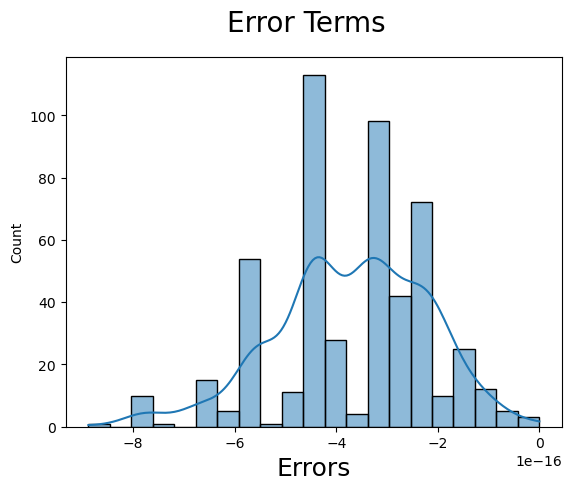

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot(y_train - y_train_pred, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Making Predictions
Applying scaling on the test data

In [44]:
rfe_test[SCALED.columns] = scaler.transform(rfe_test[SCALED.columns])

In [45]:
y_test = rfe_test.pop(TARGET)
X_test = rfe_test

In [46]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [47]:
print("X_test_new.shape: {}".format(X_test_new.shape))
print("X_train_new: {}".format(X_train_new.shape))

X_test_new.shape: (220, 7)
X_train_new: (510, 6)


In [48]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

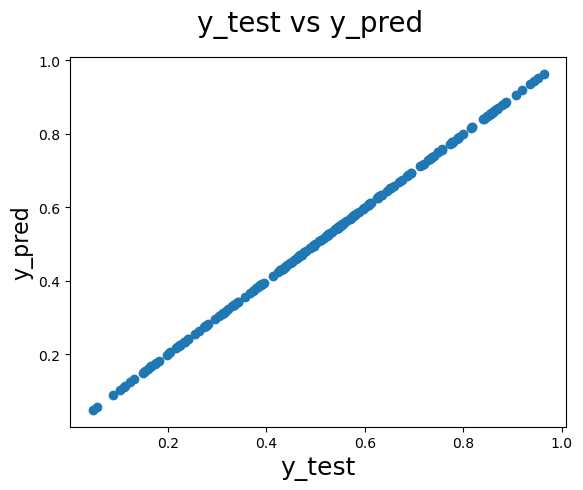

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label